## Lab 3: Point pattern analysis in R-spatstat

In this lab you will analyze point patterns of three different crime types recorded in Oakland in August
– November 2014, with the aim of understanding the potential and also the limitations of the statistical
analysis of point patterns for arriving at a better understanding of the distribution of events in a space.


## Point Pattern Analysis

As we’ve discovered in class, there are many ways to describe, measure and analyze a point pattern. In
this section, we will go through how these are performed in spatstat, before, in the next section
looking at the dataset you will analyze for this assignment. We will use three
datasets provided in spatstat to illustrate the explanations, because they exhibit clear patterns, and
because they are easier to work with. To load up the three datasets, ensure spatstat is installed and run:

In [1]:
library(spatstat)

Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.53-2       (nickname: ‘Quantum Entanglement’) 
For an introduction to spatstat, type ‘beginner’ 


Note: spatstat version 1.53-2 is out of date by more than 4 months; we recommend upgrading to the latest version.


In [2]:
# Let's load up some data
data(cells)
data(japanesepines)
data(redwoodfull)

You can find out more about each dataset by typing

In [3]:
?cells

You may want to give the datasets shorter names, to save on typing. See below for example:

In [4]:
pine <- japanesepines

It’s nice to see the patterns alongside one another, so set up the plot window for a row of three plots:

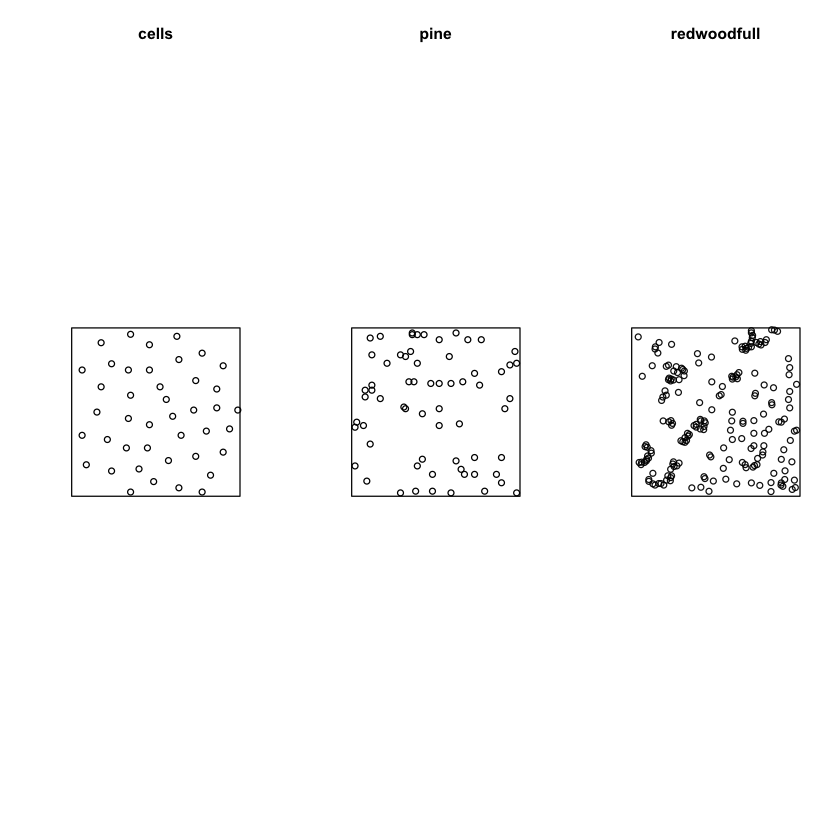

In [5]:
par(mfrow=c(1,3))
plot(cells)
plot(pine)
plot(redwoodfull)

Notice that the plot titles default to the
same as the variable names, so you may
want to use more descriptive titles. You do
this using the main=”My plot title” option, like this:

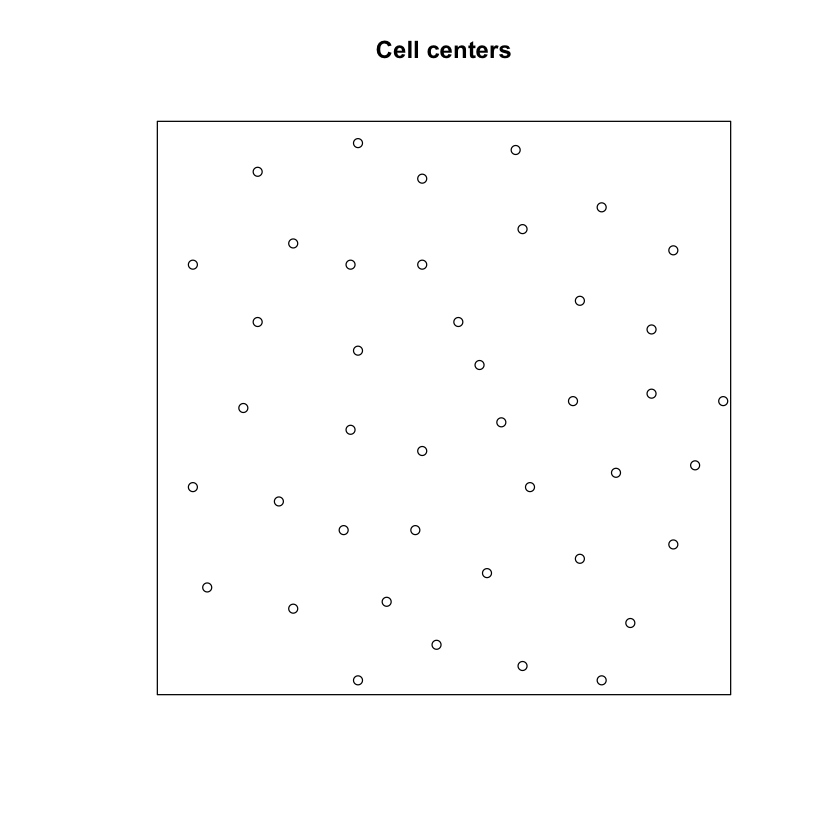

In [6]:
plot(cells, main="Cell centers")

The analysis methods we’ve looked at in class are covered in each of the sections below.

## Quadrat counting

As discussed quadrat counting is a rather limited method, and the spatstat implementation is
accordingly a bit limited, because the method is not much used. In any case, here it is below. Shown here for the cells data at three different resolutions.

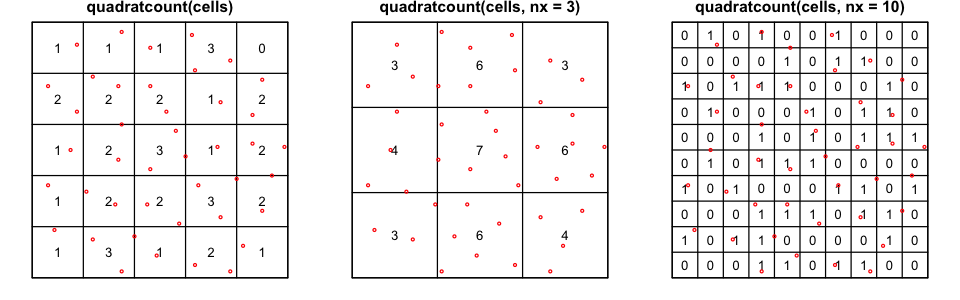

In [7]:
options(repr.plot.width=8, repr.plot.height=2.5)
par(mfrow=c(1,3), mai=c(0.1,0.1,0.1,0.1))


plot(quadratcount(cells))
plot(cells, add=T, col='red', cex=0.5)
plot(quadratcount(cells, nx=3))
plot(cells, add=T, col='red', cex=0.5)
plot(quadratcount(cells, nx=10))
plot(cells, add=T, col='red', cex=0.5)

There is also a statistical test associated with quadrat counting, which you run using: 

In [8]:
quadrat.test(cells, method="MonteCarlo", nsim=999)


	Conditional Monte Carlo test of CSR using quadrat counts
	Pearson X2 statistic

data:  cells
X2 = 9.1905, p-value = 0.008
alternative hypothesis: two.sided

Quadrats: 5 by 5 grid of tiles

This can also take different nx and ny settings. The method="MonteCarlo" and nsim=999 settings
are worth noting. This method setting tests the data by simulation, rather than based on a precalculated
Chi-square distribution. This makes the method more useful with small datasets.

The p-value of 0.006 tells us that it is very unlikely these data are the outcome of complete spatial
randomness. Try running the same analysis on the pines data to see what you get.

## Density estimation

You have already seen this in the previous lab. To create a density surface from a pattern you use the
density function. You can save the density to a variable, and examine how useful different surfaces
appear as you vary the bandwidth using the sigma parameter. For example, for the redwood data (the
most interesting for density mapping)

In [9]:
options(repr.plot.width=8, repr.plot.height=2.5)
par(mfrow=c(1,3), mai=c(0.1,0.1,0.1,0.1))


d05 <- density(redw, sigma = 0.05)
plot(d05)
contour(d05, add = TRUE)
plot(redw, add = T, cex = 0.4)



d10 <- density(redw, sigma = 0.1)
plot(d10)
contour(d10, add = TRUE)
plot(redw, add = T, cex = 0.4)


d25 <- density(redw, sigma = 0.25)
plot(d25)
contour(d25, add = TRUE)
plot(redw, add = T, cex = 0.4)


ERROR: Error in density(redw, sigma = 0.05): object 'redw' not found


As noted in the previous lab, the color scheme is not great, and you might want to experiment with
alternatives provided by the RColorBrewer package.
When it comes to selecting a bandwidth, keep in mind that density estimation is most useful as an
exploratory method, and that there is no ‘correct’ bandwidth. A function bw.diggle, or much slower,
bw.ppl will recommend a bandwidth. bw.diggle seems to favor small bandwidths, while the bw.ppl
function returns fairly plausible values (to my eye, but you may disagree). The default bandwidth used
by the density function seems to be calculated using a function called bw.scott.

## Mean nearest neighbor distance

You calculate all the nearest neighbor distances for events in a point pattern using the nndist function.
You can store the results in a new variable, which is useful for plotting them and can be helpful. 

In [ ]:
nnd_cells <- nndist(cells)
nnd_pine <- nndist(pine)
nnd_redw <- nndist(redw)

In [ ]:
hist(nnd_cells)

In [ ]:
hist(nnd_pine)
hist(nnd_redw)

If you store the result as a variable, then you can find the mean like so:

In [ ]:
mnnd_c <- mean(nnd_cells)
mnnd_p <- mean(nnd_pine)
mnnd_r <- mean(nnd_redw)
mnnd_c

No direct way to test this is provided
in spatstat, so you need to calculate your own expected value for the result, using the result given in
lectures that the expected mean nearest neighbor distance for a point pattern is 1 / 2√ λ where λ is the
density or intensity of the pattern. This is easy enough, for example:

In [ ]:
emnnd_c <- 1 / (2 * sqrt(intensity(cells)))
emnnd_c

You can then compare expected and actual mean NND values.
You can put them on the histogram to compare them visually.
You do this using the abline function, which can draw arbitrary
lines on the most recent plot you made.

In [ ]:

hist(nnd_cells)
abline(v=mnnd_c, col='red', lwd=2)
abline(v=emnnd_c, col='red', lwd=2, lty='dashed')

As you can see, in the histogram, the expected mean NND
(dashed line as set by the line type parameter lty) is very much
below the actual, which is shown as a solid red line.

## The G, F, K and g (or PCF) functions

As we saw in lectures, nearest neighbor distances on their own aren’t very useful. An array of functions
using either nearest neighbor distances (G and F) or all the inter-event distances (K and g, or the pair
correlation function, PCF) are more useful and informative. These are easily to calculate and plot:

In [ ]:
options(repr.plot.width=7, repr.plot.height=7)
par(mfrow=c(2,2))
plot(Gest(redw), main="G function Redwoods")
plot(Fest(redw), main="F function Redwoods")
plot(Kest(redw), main="K function Redwoods")
plot(pcf(redw), main="PCF function Redwoods")

The ‘est’ part of these function names indicates that these are ‘estimated’
function. Note that I’ve included more readable names for the plots shown,
using the main option. Each plot shows the function itself calculated
from the pattern as a solid black line, and dotted lines showing slight
variations depending on how we correct for edge effects. The solid black line and the dotted blue line are the most relevant. The dotted blue line is the expected line for a
pattern produced by complete spatial randomness, and is the baseline for comparison that you should
consider when evaluating such plots.

You will find that it’s hard to see what is going on with the K function because the shape of the curve
and how far it deviates from the expected line may be difficult to see. The PCF is more useful, but does
have a problem that the range of values at short distances is large. You can limit this by setting y-limits
on the plot with the ylim parameter.

In [ ]:
plot(pcf(redw), ylim=c(0, 2))

While these basic plots are helpful, they don’t allow us to statistically assess the deviation of patterns from randomness (or potentially from other point process models). To do this we make use of the envelope function to calculate many random values for the function and compare it with the actual data. In its simplest form, this actually very easy:

In [ ]:
plot(envelope(redw, pcf), ylim=c(0,2))

I’ve shown this for PCF, but it can easily be changed for any of the other functions Fest, Gest or Kest. When this runs, R
tells you that it is running 99 simulations of complete spatial randomness (CSR) for the data, and it is using these to
construct the envelope of results shown in gray in the plot.

The black line shows the function as calculated from the data, and the idea is to compare the two. Anywhere that the data
(the black line) is inside the envelope from the simulation results, we can say that it is consistent with what we would
expect from the simulated process, but when it is outside the range, it indicates some kind of departure from the simulated
process. Here, you will see when you run the envelope for PCF on the redwood dataset that at distances below about
0.06 the PCF is unexpectedly high indicating clustering at these distances. There is a small departure below the
envelope around 0.23, but this appears minor and may not be very important, although it may relate to the scale of the gaps
in the redwood pattern.

You can also use this method to compare your pattern to any pattern produced by any process, given that complete spatial randomness is unlikely in practice (redwoods don’t just fall out of the sky), so it
may be more interesting to see how a pattern compares to one that is more likely given your observed data. An example might be to use the density derived from the data, as a basis for an inhomogeneous Poisson process. This allows you to partially separate first and second order effects. Here’s an example:

In [ ]:
par(mfrow=c(1,1))
dc <- density(cells, sigma=0.2)
env <- envelope(cells, pcf, simulate=expression(rpoispp(dc)), nsim=499)
plot(env, ylim=c(0,4), main='Envelope for 499 simulations PCF, cells')

In [ ]:
plot(dc, main="Density of cells, sigma=0.2")
plot(cells, add=TRUE)

The code `simulate=expression(rpoispp(dc)), nsim=499` in the envelope function tells spatstat not to use complete spatial randomness for the simulated patterns that determine the envelope, but instead to use the function provided in the expression statement. Here I have specified that rpoispp(dc) should be used, which is an inhomogeneous Poisson process based on the density calculated from the pattern. That means that the simulated patterns include first order effects from the original pattern, so remaining departures from expectations should reflect second order effects only. The plot confirms this: there is evidence for a lack of inter-event distances up to around 0.1, and also evidence of ‘too many’ inter-event distances around 0.15 (which is the near-uniform spacing of the events in this pattern).

This is a fairly advanced concept, but it is worth trying to get your head around it, as it is the basis on
which the most sophisticated point pattern analysis work in research settings is performed.

## Getting real data into R

Now you’ve seen how to do point pattern analysis in R-spatstat you need to get the real world data you’ll be looking at into R. The data are police recorded crime events in Oakland from August to November 2014. The original dataset included around 10,000 events. Close to 1,000 of these had to be omitted as they could not be geocoded (the address information was inaccurate) or they were all geolocated to the Oakland Courthouse, which was almost certainly inaccurate (i.e. it was not where the
crime occurred, but where it was recorded). That still leaves around 9,000 events in the original data.

Unfortunately, this is a bit too many events to work with for an introductory exercise, so I have further filtered the data down so you now have four crime types to look at:

- Disorderly conduct events, in file dis_con.csv
- Narcotics related events in file narc.csv
- Robbery events in file robbery.csv
- Residential burglaries in file burg_res.csv

These are all CSV or comma-separated variables files containing just the X and Y coordinates of the
crime events (the units are miles, from an arbitrary origin, which does not concern us here).

To get these files into R we can do a `read.csv` function

In [10]:
burg <- read.csv("data/burg_res.csv", header=TRUE)
dc <- read.csv("data/dis_con.csv", header=TRUE)
narc <- read.csv("data/narc.csv", header=TRUE)
rob <- read.csv("data/robbery.csv", header=TRUE)

The format of the files are two columns with X Y coordinates

In [11]:
summary(burg)

       X                Y        
 Min.   :-97.78   Min.   :85.56  
 1st Qu.:-95.28   1st Qu.:88.58  
 Median :-93.15   Median :90.20  
 Mean   :-93.36   Mean   :90.14  
 3rd Qu.:-91.70   3rd Qu.:91.49  
 Max.   :-88.27   Max.   :95.14  

We can also see what the spatial pattern of this looks like with:

In [12]:
par(mfrow=c(2,2))
plot(rob, main="Robbery")
plot(burg, main="Residential Burglary")
plot(narc, main="Narcotics")
plot(dc, main="Disorderly Conduct")

ERROR: Error in replayPlot(obj): invalid graphics state


Plot with title “Disorderly Conduct”

But you should notice a problem. As far as R is
concerned these are just any old data, that
happen to be labeled ‘X’ and ‘Y’ they are not a
spatial point pattern dataset, where the X and Y
coordinates are specifically related to
geographical location.
To prepare the data for analysis as point patterns
we need to use two additional R packages
maptools and rgdal

In [13]:
library(rgdal)
library(sp)

Loading required package: sp
rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/GDAL.framework/Versions/2.1/Resources/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.1, 04 March 2015, [PJ_VERSION: 491]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-5 


In [24]:
oak <- readOGR("data/shapefiles/oak_miles.shp")
oak <- as(oak, "SpatialPolygons")

OGR data source with driver: ESRI Shapefile 
Source: "data/shapefiles/oak_miles.shp", layer: "oak_miles"
with 1 features
It has 1 fields


In [25]:
oakW <- as.owin(oak)

ERROR: Error in as.owin.default(Z, ..., fatal = fatal): Can't interpret W as a window


In [ ]:
unitname(oakW) <- c('mile', 'miles')

In [ ]:
burg <- as.ppp(burg, W=oak)